1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
####### Generation of the dataset
N = 200
data = np.zeros((3,N))
x1 = np.random.normal(loc = 0,scale = 1, size = N)
x2 = np.random.normal(loc = 0+0, scale = 1+3, size = N)
#x2 = x1 + np.random.normal(loc = 0, scale = 3, size = N)
#x3 = np.random.normal(loc = 0, scale = 1+1+4, size = N)
x3 = 2*x1 + x2

#data[:,0] = x1
#data[:,1] = x2
#data[:,2] = x3
data[0,:] = x1.T
data[1,:] = x2.T
data[2,:] = x3.T 

#if the two normal distribution are indipendent --> their sum is still a normal distribution
# with mean = sum of the means and standard deviation = sum of the standard deviations

####### Eigenvalues decomposition of the Covariance Matrix

data_cent = data - data.mean(axis = 1)[:,np.newaxis]
p = data.shape[1] 
C1 = data_cent.dot(data_cent.T) / (p - 1)
C = np.cov(data)
print('Covariance Matrix :\n', C,'\n\nCovariance Matrix with np:\n',C1)
print('Are the covariance matrices equal?', np.allclose(C,C1),'\n')
l, V = la.eig(C)
l = np.real_if_close(l)
idx = l.argsort()[::-1]
l = l[idx] #i am sorting the eigenvalues and eigenvectors
V = V[idx]

###### Eigenvalues decomposition using SVD
U, s, Vt = la.svd(data_cent)
l_svd = s**2 /(p-1)
l_svd = np.real_if_close(l_svd)
V_svd = U

## Check if the results are the same
print('Eigenvalues with Eigendecomposition:\n', l,'\n')
print('Eigenvalues with SVD:\n', l_svd,'\n')
print('Are the found eigenvalues equal? ', np.allclose(l,l_svd),'\n')

print('Eigenvectors with Eigendecomposition:\n', V,'\n')
print("Eigenvectors with SVD:\n", V_svd,'\n')

Covariance Matrix :
 [[ 0.93880412 -0.41607609  1.46153214]
 [-0.41607609 16.98995762 16.15780543]
 [ 1.46153214 16.15780543 19.08086972]] 

Covariance Matrix with np:
 [[ 0.93880412 -0.41607609  1.46153214]
 [-0.41607609 16.98995762 16.15780543]
 [ 1.46153214 16.15780543 19.08086972]]
Are the covariance matrices equal? True 

Eigenvalues with Eigendecomposition:
 [ 3.42453833e+01  2.76424814e+00 -1.33226763e-15] 

Eigenvalues with SVD:
 [3.42453833e+01 2.76424814e+00 7.91493826e-31] 

Are the found eigenvalues equal?  True 

Eigenvectors with Eigendecomposition:
 [[ 0.40824829 -0.54808807  0.73002247]
 [-0.40824829  0.6056554   0.68301893]
 [-0.81649658 -0.57687174  0.02350177]] 

Eigenvectors with SVD:
 [[-0.02350177  0.57687174 -0.81649658]
 [-0.68301893 -0.6056554  -0.40824829]
 [-0.73002247  0.54808807  0.40824829]] 



In [3]:
####### What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? 
Lambda = np.diag(l)
for el in range(len(l)):
    print('By selecting the component ', int(el), ', we retain %.2f%% of the total variability' % abs(((Lambda[el, el]*100)/Lambda.trace())))
print('\n')

##### Given how the dataset was constructed, do these make sense? 
# Yes, it does since the third variable depends on the first two (that, instead, are indipendent from each other 
# [x2 is DISTRIBUTED not GIVEN as x1 + another normal distribution]), so it does not contain any additional variability.
    
    
####### Reduce the dimensionality of the system so that at least 99% of the total variability is retained
Lambda_red = np.zeros((Lambda.shape))
var = 0
i = 0
for li in l:
    var = var+li
    Lambda_red[i,i] = li
    if abs((var)/Lambda.trace()) >= 0.99:
        break
    i += 1
#print(Lambda_red)
print("By reducing the dimensionality of the system, we retain %.2f%% of the total variability" % abs(((Lambda_red.trace()*100)/Lambda.trace())))


By selecting the component  0 , we retain 92.53% of the total variability
By selecting the component  1 , we retain 7.47% of the total variability
By selecting the component  2 , we retain 0.00% of the total variability


By reducing the dimensionality of the system, we retain 100.00% of the total variability


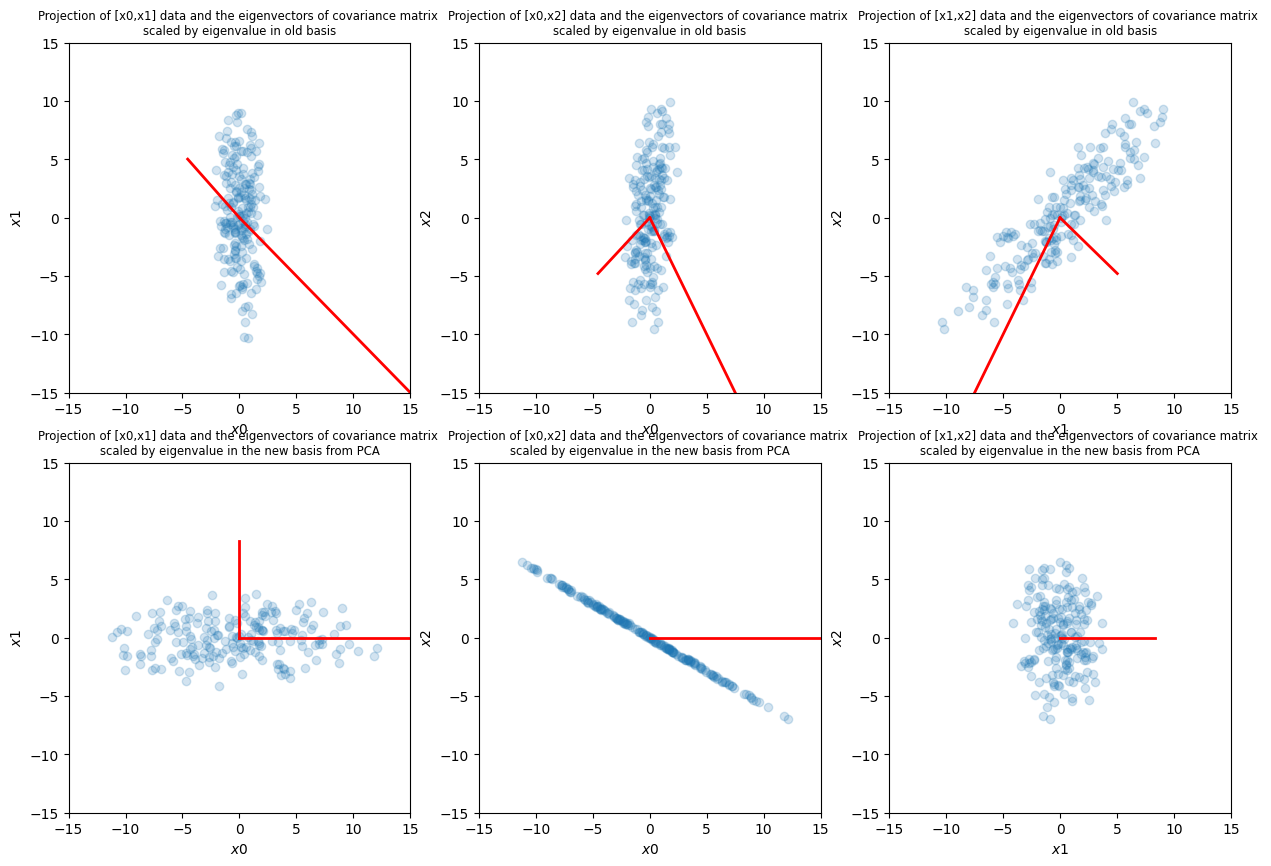

In [5]:
####### Redefine the data according to the new basis from the PCA
dataP = np.dot(V.T,data)
scale_factor = 3

####### Plot the data, in both the original and the new basis. 
# The figure should have 2 rows (the original and the new basis) and 3 columns (the  [𝑥0,𝑥1], [x0,x2], [x1,x2] of scatter plots)

#creating a figure with 4 subplots
fig, ax = plt.subplots(nrows=2, ncols = 3, figsize = (15,10))
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[0,2]
ax4 = ax[1,0]
ax5 = ax[1,1]
ax6 = ax[1,2]

#Fig 1
ax1.scatter(x=data[0,:], y=data[1,:],alpha = 0.2)
ax1.set_title('Projection of [x0,x1] data and the eigenvectors of covariance matrix \nscaled by eigenvalue in old basis', fontsize = 'small')
ax1.axis([-15,15,-15,15])
ax1.set_xlabel('$x0$')
ax1.set_ylabel('$x1$')
for li, vi in zip(l, V.T):
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)

#Fig 2
ax4.scatter(x=dataP[0,:], y=dataP[1,:],alpha = 0.2)
ax4.set_title('Projection of [x0,x1] data and the eigenvectors of covariance matrix \nscaled by eigenvalue in the new basis from PCA', fontsize = 'small')
ax4.axis([-15,15,-15,15])
ax4.set_xlabel('$x0$')
ax4.set_ylabel('$x1$')
for li, vi in zip(l, np.dot(V.T, V)): 
    ax4.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    
#Fig 3 
ax2.scatter(x=data[0,:], y=data[2,:],alpha = 0.2)
ax2.set_title('Projection of [x0,x2] data and the eigenvectors of covariance matrix \nscaled by eigenvalue in old basis',fontsize = 'small')
ax2.axis([-15,15,-15,15])
ax2.set_xlabel('$x0$')
ax2.set_ylabel('$x2$')
for li, vi in zip(l, V.T):
    ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)

#Fig 4 
ax5.scatter(x=dataP[0,:], y=dataP[2,:],alpha = 0.2)
ax5.set_title('Projection of [x0,x2] data and the eigenvectors of covariance matrix \nscaled by eigenvalue in the new basis from PCA', fontsize = 'small')
ax5.axis([-15,15,-15,15])
ax5.set_xlabel('$x0$')
ax5.set_ylabel('$x2$')
for li, vi in zip(l, np.dot(V.T, V)): 
    ax5.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)

#Fig 5
ax3.scatter(x=data[1,:], y=data[2,:],alpha = 0.2)
ax3.set_title('Projection of [x1,x2] data and the eigenvectors of covariance matrix \nscaled by eigenvalue in old basis', fontsize ='small')
ax3.axis([-15,15,-15,15])
ax3.set_xlabel('$x1$')
ax3.set_ylabel('$x2$')
for li, vi in zip(l, V.T):
    ax3.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)

#Fig 6
ax6.scatter(x=dataP[1,:], y=dataP[2,:],alpha = 0.2)
ax6.set_title('Projection of [x1,x2] data and the eigenvectors of covariance matrix \nscaled by eigenvalue in the new basis from PCA', fontsize = 'small')
ax6.axis([-15,15,-15,15])
ax6.set_xlabel('$x1$')
ax6.set_ylabel('$x2$')
for li, vi in zip(l, np.dot(V.T, V)): 
    ax6.plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Covariance Matrix :
 [[ 0.96628401 -0.33200175  1.52292201]
 [-0.33200175 17.10962346 16.26126131]
 [ 1.52292201 16.26126131 19.13639837]] 

Covariance Matrix with np:
 [[ 0.96628401 -0.33200175  1.52292201]
 [-0.33200175 17.10962346 16.26126131]
 [ 1.52292201 16.26126131 19.13639837]]
Are the covariance matrices equal? True 

Eigenvalues with Eigendecomposition:
 [3.44391209e+01 2.74537978e+00 2.78051212e-02] 

Eigenvalues with SVD:
 [3.44391209e+01 2.74537978e+00 2.78051212e-02] 

Are the found eigenvalues equal?  True 

Eigenvectors with Eigendecomposition:
 [[ 0.41260996 -0.5458812   0.72922338]
 [-0.40861265  0.60456528  0.68376643]
 [-0.81411837 -0.58009874  0.02639569]] 

Eigenvectors with SVD:
 [[-0.02639569  0.58009874 -0.81411837]
 [-0.68376643 -0.60456528 -0.40861265]
 [-0.72922338  0.5458812   0.41260996]] 

By selecting the component  0 , we retain 92.55% of the total variability
By selecting the component  1 , we retain 7.38% of the total variability
By selecting the comp

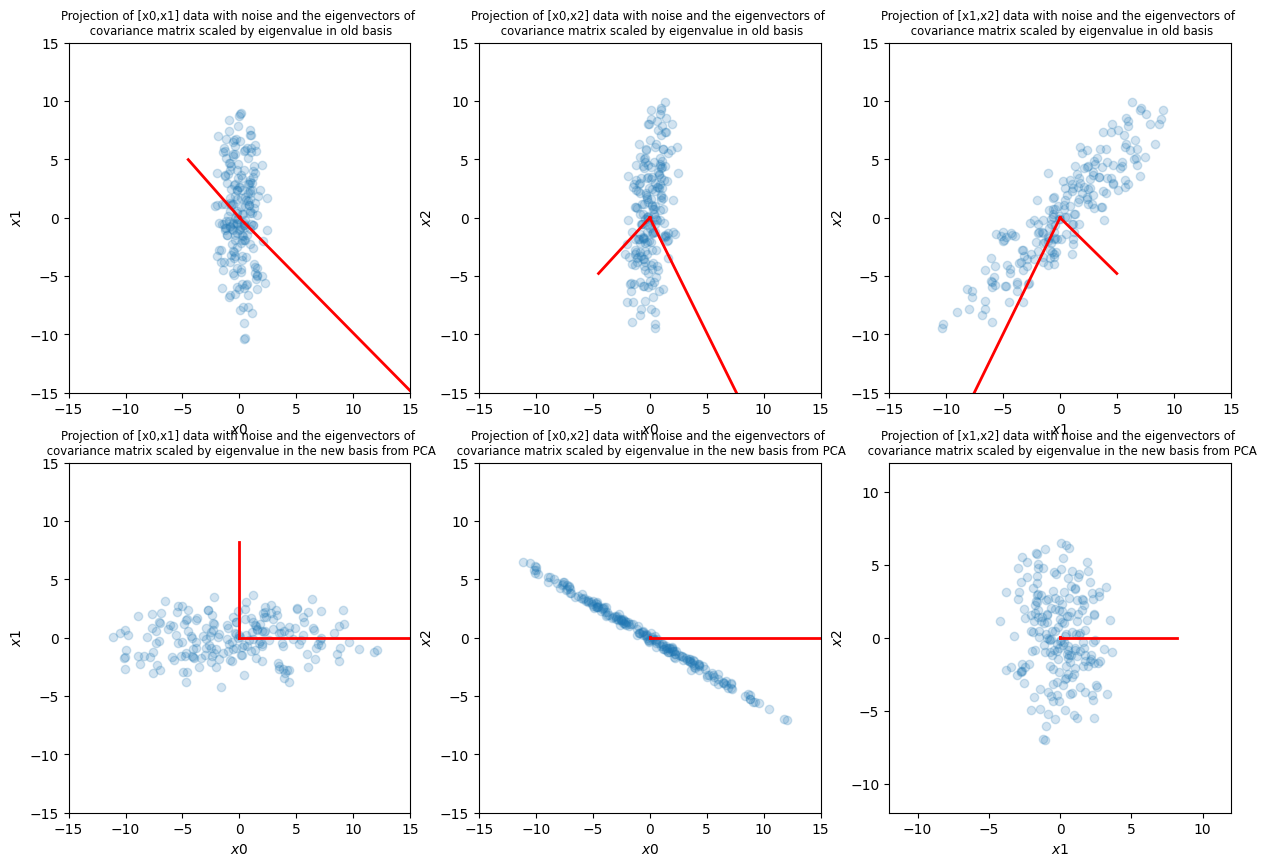

In [6]:
noise = np.random.normal(loc = 0, scale = 1/20, size = (3,N,10))
data_noise = data + np.sum(noise, axis = 2)

####### Eigenvalues decomposition of the Covariance Matrix

data_noise_cent = data_noise - data_noise.mean(axis = 1)[:,np.newaxis]
p = data.shape[1] 
C1 = data_noise_cent.dot(data_noise_cent.T) / (p - 1)
C = np.cov(data_noise)
print('Covariance Matrix :\n', C,'\n\nCovariance Matrix with np:\n',C1)
print('Are the covariance matrices equal?', np.allclose(C,C1),'\n')
l, V = la.eig(C)
l = np.real_if_close(l)
idx = l.argsort()[::-1]
l = l[idx] #i am sorting the eigenvalues and eigenvectors
V = V[idx]

###### Eigenvalues decomposition using SVD
U, s, Vt = la.svd(data_noise_cent)
l_svd = s**2 /(p-1)
l_svd = np.real_if_close(l_svd)
V_svd = U

## Check if the results are the same
print('Eigenvalues with Eigendecomposition:\n', l,'\n')
print('Eigenvalues with SVD:\n', l_svd,'\n')
print('Are the found eigenvalues equal? ', np.allclose(l,l_svd),'\n')

print('Eigenvectors with Eigendecomposition:\n', V,'\n')
print("Eigenvectors with SVD:\n", V_svd,'\n')

####### What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? 
Lambda = np.diag(l)
for el in range(len(l)):
    print('By selecting the component ', int(el), ', we retain %.2f%% of the total variability' % abs(((Lambda[el, el]*100)/Lambda.trace())))
print('\n')

####### Reduce the dimensionality of the system so that at least 99% of the total variability is retained
Lambda_red = np.zeros((Lambda.shape))
var = 0
i = 0
for li in l:
    var = var+li
    Lambda_red[i,i] = li
    if abs((var)/Lambda.trace()) >= 0.99:
        break
    i += 1
#print(Lambda_red)
print("By reducing the dimensionality of the system, we retain %.2f%% of the total variability" % abs(((Lambda_red.trace()*100)/Lambda.trace())))

####### Redefine the data according to the new basis from the PCA
data_noise_P = np.dot(V.T,data_noise)
#scale_factor = 3

####### Plot the data, in both the original and the new basis. 
# The figure should have 2 rows (the original and the new basis) and 3 columns (the  [𝑥0,𝑥1], [x0,x2], [x1,x2] of scatter plots)

#creating a figure with 4 subplots
fig, ax = plt.subplots(nrows=2, ncols = 3, figsize = (15,10))
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[0,2]
ax4 = ax[1,0]
ax5 = ax[1,1]
ax6 = ax[1,2]

#Fig 1
ax1.scatter(x=data_noise[0,:], y=data_noise[1,:],alpha = 0.2)
ax1.set_title('Projection of [x0,x1] data with noise and the eigenvectors of \n covariance matrix scaled by eigenvalue in old basis', fontsize = 'small')
ax1.axis([-15,15,-15,15])
ax1.set_xlabel('$x0$')
ax1.set_ylabel('$x1$')
for li, vi in zip(l, V.T):
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)

#Fig 2
ax4.scatter(x=data_noise_P[0,:], y=data_noise_P[1,:],alpha = 0.2)
ax4.set_title('Projection of [x0,x1] data with noise and the eigenvectors of \n covariance matrix scaled by eigenvalue in the new basis from PCA', fontsize = 'small')
ax4.axis([-15,15,-15,15])
ax4.set_xlabel('$x0$')
ax4.set_ylabel('$x1$')
for li, vi in zip(l, np.dot(V.T, V)): 
    ax4.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    
#Fig 3 
ax2.scatter(x=data_noise[0,:], y=data_noise[2,:],alpha = 0.2)
ax2.set_title('Projection of [x0,x2] data with noise and the eigenvectors of \n covariance matrix scaled by eigenvalue in old basis',fontsize = 'small')
ax2.axis([-15,15,-15,15])
ax2.set_xlabel('$x0$')
ax2.set_ylabel('$x2$')
for li, vi in zip(l, V.T):
    ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)

#Fig 4 
ax5.scatter(x=data_noise_P[0,:], y=data_noise_P[2,:],alpha = 0.2)
ax5.set_title('Projection of [x0,x2] data with noise and the eigenvectors of \n covariance matrix scaled by eigenvalue in the new basis from PCA', fontsize = 'small')
ax5.axis([-15,15,-15,15])
ax5.set_xlabel('$x0$')
ax5.set_ylabel('$x2$')
for li, vi in zip(l, np.dot(V.T, V)): 
    ax5.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)

#Fig 5
ax3.scatter(x=data_noise[1,:], y=data_noise[2,:],alpha = 0.2)
ax3.set_title('Projection of [x1,x2] data with noise and the eigenvectors of \n covariance matrix scaled by eigenvalue in old basis', fontsize ='small')
ax3.axis([-15,15,-15,15])
ax3.set_xlabel('$x1$')
ax3.set_ylabel('$x2$')
for li, vi in zip(l, V.T):
    ax3.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)

#Fig 6
ax6.scatter(x=data_noise_P[1,:], y=data_noise_P[2,:],alpha = 0.2)
ax6.set_title('Projection of [x1,x2] data with noise and the eigenvectors of \n covariance matrix scaled by eigenvalue in the new basis from PCA', fontsize = 'small')
ax6.axis([-12,12,-12,12])
ax6.set_xlabel('$x1$')
ax6.set_ylabel('$x2$')
for li, vi in zip(l, np.dot(V.T, V)): 
    ax6.plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 